In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import poisson

### __Качественные (категориальные) данные__ - описывают принадледжность объекта к определенной группе

__Номинальные данные__ - не могут быть упорядочены, их сравнение не имеет смыла

In [2]:
cars = pd.DataFrame({'model' : ['Renault', 'Hyundai', 'KIA', 'Toyota'],
              'stock' : [12, 36, 28, 32]})

cars

,model,stock
0,Renault,12
1,Hyundai,36
2,KIA,28
3,Toyota,32


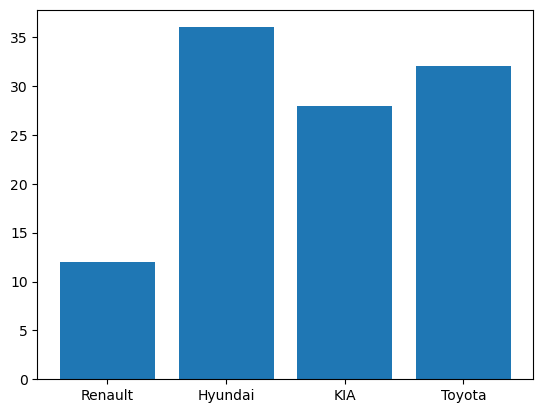

In [3]:
# выведем эти данные с помощью столбчатой диаграммы
plt.bar(cars.model, cars.stock);

__Порядковые данные__ - свойственна внутренняя иерархия, их можно проранжировать

In [4]:
satisfaction = pd.DataFrame({'sat_level': ['Good', 'Medium', 'Good', 'Medium', 'Bad', 'Medium', 'Good', 'Medium', 'Medium', 'Bad']})

satisfaction

,sat_level
0,Good
1,Medium
2,Good
3,Medium
4,Bad
5,Medium
6,Good
7,Medium
8,Medium
9,Bad


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


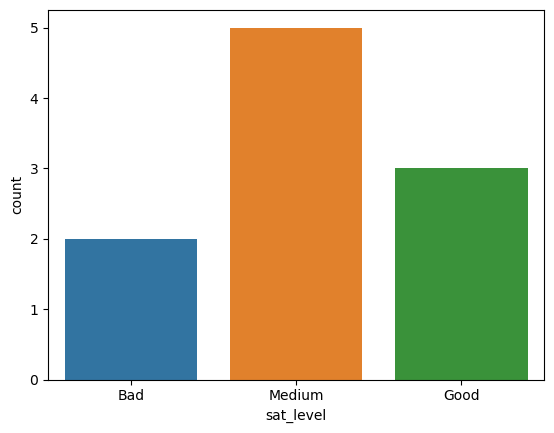

In [5]:
# переведм данные в тип categorical 
satisfaction.sat_level = pd.Categorical(satisfaction.sat_level,
                                        categories = ['Bad', 'Medium', 'Good'],
                                        ordered = True)
sns.countplot(x = 'sat_level', data = satisfaction);

### __Количественные данные__

__Дискретные данные__ - принимают строго определенные значения

__Неприрывные данные__ - всегда выражены неограниченным числом значений

__Распределение Пуассона__

In [6]:
# передадим функции np.random.poisson()
# матожидание (lam) и желаемое количество экспериметнов (size)
res = np.random.poisson(lam = 3, size = 1000)
# выведем первые 10 значений
res[:10]

array([2, 3, 2, 4, 2, 2, 3, 1, 3, 3])

In [7]:
# посмотрим сколько раз могло наступить событие и как часто оно встречалось
unique, counts = np.unique(res, return_counts = True)
unique, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 42, 137, 237, 225, 178,  96,  46,  23,  12,   2,   1,   1],
       dtype=int64))

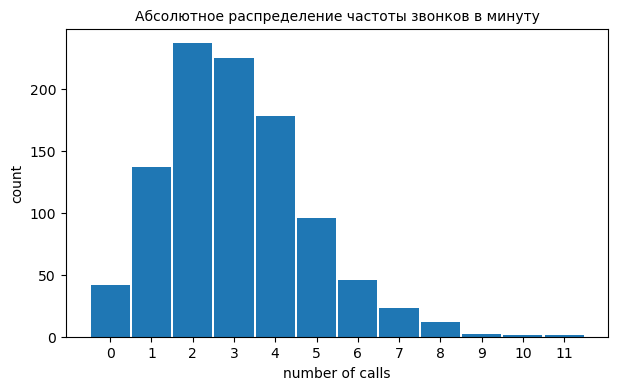

In [8]:
plt.figure(figsize = (7, 4))

# перед построением графика переведем значения unique в тип str 
plt.bar([str(x) for x in unique], counts, width = 0.95)
plt.title('Абсолютное распределение частоты звонков в минуту', fontsize = 10)
plt.xlabel('number of calls', fontsize = 10)
plt.ylabel('count', fontsize = 10);

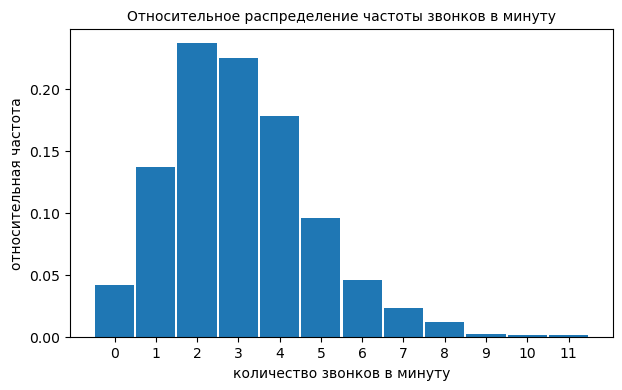

In [9]:
# рассмотрим как распределено количество событий относительно их общего числа
plt.figure(figsize = (7, 4))

# для этого разделим количество звонков в каждом из столбцов на общее число звонков
plt.bar([str(x) for x in unique], counts / len(res), width = 0.95)
plt.title('Относительное распределение частоты звонков в минуту', fontsize = 10)
plt.xlabel('количество звонков в минуту', fontsize = 10)
plt.ylabel('относительная частота', fontsize = 10);

In [10]:
# какова вероятность получить более шести звонков в минуту
# разделим число наблюдений, в которых было более шести звонков, на их общее количество
np.round(len(res[res > 6])/len(res), 3)

0.039

In [11]:
# какова вероятность получить от двух до шести звонков в минуту
np.round(len(res[res <6])/len(res) - len(res[res < 2])/len(res), 3)

0.736

__Воспользуемся библиотекой scipy__

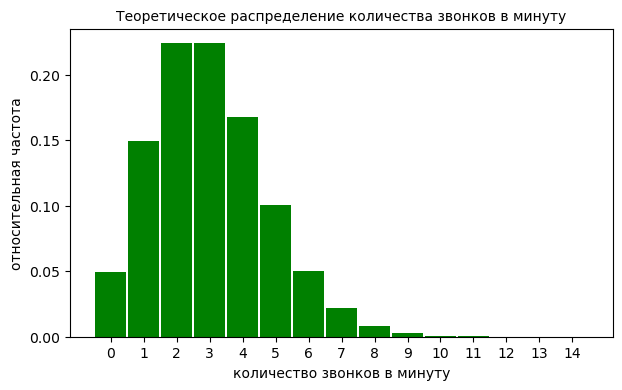

In [12]:
# создадим последовательность целых чисел от 0 до 14
x = np.arange(15)
# передадим им в функцию poisson.pmf()
# mu в данном случае это матожидание (lambda из формулы)
f = poisson.pmf(x, mu = 3)

# построим график теоретического распределения, изменив для наглядности его цвет
plt.figure(figsize = (7,4))
plt.bar([str(x) for x in x], f, width = 0.95, color = 'green')
plt.title('Теоретическое распределение количества звонков в минуту', fontsize = 10)
plt.xlabel('количество звонков в минуту', fontsize = 10)
plt.ylabel('относительная частота', fontsize = 10);

__функция poisson.cdf()__

In [13]:
# рассчитаем вероятность получения нуля звонков или одного звонка в час
# на графике это сумма площадей первого и второго столбцов
poisson.cdf(1, 3).round(3)

0.199

In [14]:
# найдем площадь столбцов до шести звонков в минуту включительно
# и вычтем результат из единицы
np.round(1 - poisson.cdf(6, 3), 3)

0.034

In [15]:
# для выполнения второго задания вычтем площадь столбцов ноль и один
# из площади столбцов до шестого включительно
np.round(poisson.cdf(6, 3) - poisson.cdf(1, 3), 3)

0.767

### __Перекрестные данные__

In [18]:
# создадим dataframe
csect = pd.DataFrame({'countries' : ['France', 'Belgium', 'Spain'],
                      'healthcare' : [4492, 5428, 3616],
                      'education' : [9210, 10869, 6498]})

csect

,countries,healthcare,education
0,France,4492,9210
1,Belgium,5428,10869
2,Spain,3616,6498


<function matplotlib.pyplot.show(close=None, block=None)>

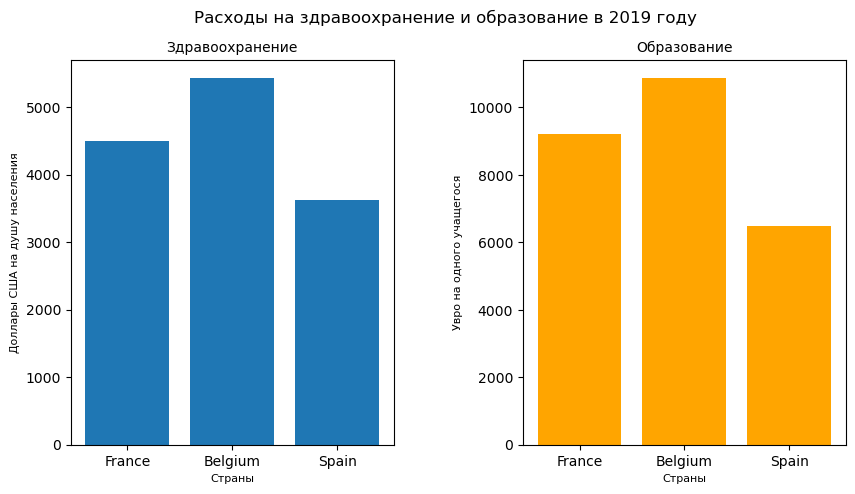

In [24]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1) # передаваемые параметры: nrows, ncols, index
plt.bar(csect.countries, csect.healthcare)
plt.title('Здравоохранение', fontsize = 10)
plt.xlabel('Страны', fontsize = 8)
plt.ylabel('Доллары США на душу населения', fontsize = 8)

plt.subplot(122)
plt.bar(csect.countries, csect.education, color = 'orange')
plt.title('Образование', fontsize = 10)
plt.xlabel('Страны', fontsize = 8)
plt.ylabel('Увро на одного учащегося', fontsize = 8)

# отрегулируем пространство между графиками
plt.subplots_adjust(wspace = 0.4)

# зададим общий график
plt.suptitle('Расходы на здравоохранение и образование в 2019 году', fontsize = 12)

plt.show

### __Временные ряды__

In [27]:
# создадим временной ряд расходов на здравоохранение 
tseries = pd.DataFrame({'year' : [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
                       'healthcare' : [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492]})

# преобразуем год в объект datetime
tseries.year = pd.to_datetime(tseries.year, format = '%Y')
# и сделаем этот столбец индексом
tseries.set_index('year', drop = True, inplace = True)

tseries

,healthcare
year,
2010-01-01,4598
2011-01-01,4939
2012-01-01,4651
2013-01-01,4902
2014-01-01,4999
2015-01-01,4208
2016-01-01,4268
2017-01-01,4425
2018-01-01,4690


Text(0.5, 1.0, 'Расходы на здравоохранение на душу населения во Франции с 2010 по 2019 годы')

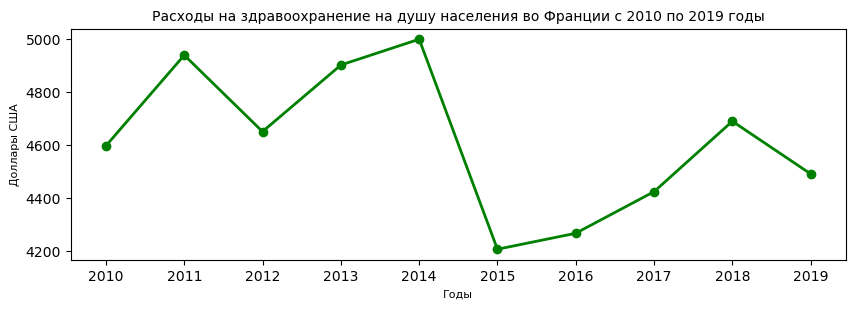

In [33]:
plt.figure(figsize = (10, 3))
# укажем цвет, толщину линии и вид маркера\
plt.plot(tseries, color = 'green', linewidth = 2, marker = 'o')

plt.xlabel('Годы', fontsize = 8)
plt.ylabel('Доллары США', fontsize = 8)
plt.title('Расходы на здравоохранение на душу населения во Франции с 2010 по 2019 годы', fontsize = 10)

__Панельные данные__

In [35]:
pdata = pd.DataFrame({'healthcare' : [4208, 4268, 4425, 4690, 4492, 4290, 4323, 4618, 4913, 4960, 2349, 2377, 2523, 2736, 2542]})

In [38]:
# Подготовим кортежи для иерархического индекса
rows = [('France', '2015'),
        ('France', '2016'),
        ('France', '2017'),
        ('France', '2018'),
        ('France', '2019'),
        ('Belgium', '2015'),
        ('Belgium', '2016'),
        ('Belgium', '2017'),
        ('Belgium', '2018'),
        ('Belgium', '2019'),
        ('Spain', '2015'),
        ('Spain', '2016'),
        ('Spain', '2017'),
        ('Spain', '2018'),
        ('Spain', '2019')]

# передадим кортежи в функцию pd.MultiIndex.from_tuples(), указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['country', 'year'])

# сделаем custom_multindex индексом датафрейма с панелььными данными
pdata.index = custom_multindex

pdata

healthcare
country year            
France  2015        4208
        2016        4268
        2017        4425
        2018        4690
        2019        4492
Belgium 2015        4290
        2016        4323
        2017        4618
        2018        4913
        2019        4960
Spain   2015        2349
        2016        2377
        2017        2523
        2018        2736
        2019        2542

__Визуализация панельных данных__

In [39]:
# превратим трехмерный массив обратно в двумерный с помощью метода .unstack()
pdata_unstacked = pdata.healthcare.unstack(level = 0)

pdata_unstacked

country,Belgium,France,Spain
year,,,
2015,4290,4208,2349
2016,4323,4268,2377
2017,4618,4425,2523
2018,4913,4690,2736
2019,4960,4492,2542


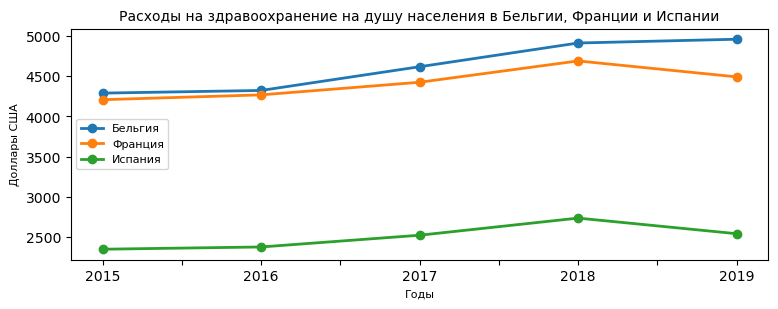

In [42]:
plt.figure(figsize = (9, 3))

# построим три кривые
pdata_unstacked.Belgium.plot(linewidth = 2, marker = 'o', label = 'Бельгия')
pdata_unstacked.France.plot(linewidth = 2, marker = 'o', label = 'Франция')
pdata_unstacked.Spain.plot(linewidth = 2, marker = 'o', label = 'Испания')

plt.xlabel('Годы', fontsize = 8)
plt.ylabel('Доллары США', fontsize = 8)
plt.title('Расходы на здравоохранение на душу населения в Бельгии, Франции и Испании', fontsize = 10)
plt.legend(loc = 'center left', prop = {'size' : 8})

plt.show()

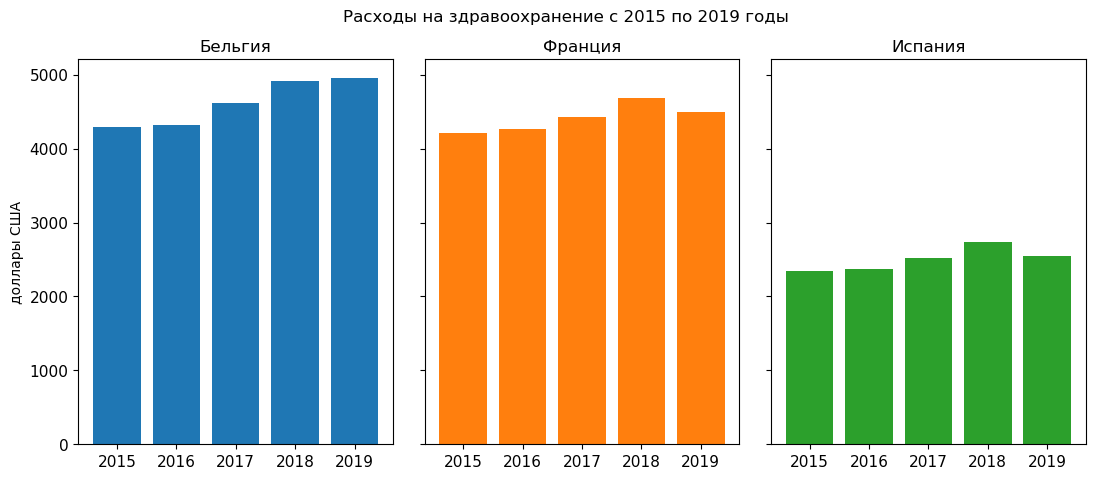

In [43]:
pdata_unstacked.plot(kind = 'bar',                              # создадим столбчатые диаграммы,
                     subplots = True,                           # разместим их на подграфиках,
                     layout = (1, 3),                           # на сетке из одной строки и трех столбцов
                     rot = 0,                                   # сделаем подписи по оси х горизонтальными
                     figsize = (13, 5),                         # зададим внешний размер для трех графиков
                     sharey = True,                             # важно иметь одинаковую шкалу по оси у для сравнения расходов
                     fontsize = 11,                             # зададим размер шрифта едениц измерения по обеим шкалам
                     width = 0.8,                               # ширину столбцов
                     xlabel = '',                               # уберем подписи к годам
                     ylabel = 'доллары США',                    # поставим подпись по оси у
                     legend = None,                             # уберем легенду
                     title = ['Бельгия', 'Франция', 'Испания']) # названия столбцов по русски

# отрегулируем ширину между графиками
plt.subplots_adjust(wspace = 0.1)

# добавим общий заголовок
plt.suptitle('Расходы на здравоохранение с 2015 по 2019 годы', fontsize = 12);

__Многомерный временной ряд__

In [45]:
tseries_mult = pd.DataFrame({'year' :       [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
                             'healthcare' : [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492],
                             'education' :  [5.69, 5.52, 5.46, 5.50, 5.51, 5.46, 5.48, 5.45, 5.41, 6.62]})

# превратим год в объект datetime
tseries_mult.year = pd.to_datetime(tseries_mult.year, format = '%Y')
# и сделаем этот столбец индексом
tseries_mult.set_index('year', drop = True, inplace = True)

tseries_mult

,healthcare,education
year,,
2010-01-01,4598,5.69
2011-01-01,4939,5.52
2012-01-01,4651,5.46
2013-01-01,4902,5.50
2014-01-01,4999,5.51
2015-01-01,4208,5.46
2016-01-01,4268,5.48
2017-01-01,4425,5.45
2018-01-01,4690,5.41


__Многомерные панельные данные__

In [46]:
pdata_mult = pd.DataFrame({'healthcare, per capita' : [4208, 4268, 4425, 4690, 4492, 4290, 4323, 4618, 4913, 4960, 2349, 2377, 2523, 2736, 2542],
                           'education, % of GDP'  : [5.46, 5.48, 5.45, 5.41, 6.62, 6.45, 6.46, 6.43, 6.38, 6.40, 4.29, 4.23, 4.21, 4.18, 4.26]})
 
# создадим кортежи для иерархического индекса
rows = [('France', '2015'),
        ('France', '2016'),
        ('France', '2017'),
        ('France', '2018'),
        ('France', '2019'),
        ('Belgium', '2015'),
        ('Belgium', '2016'),
        ('Belgium', '2017'),
        ('Belgium', '2018'),
        ('Belgium', '2019'),
        ('Spain', '2015'),
        ('Spain', '2016'),
        ('Spain', '2017'),
        ('Spain', '2018'),
        ('Spain', '2019')]
 
# передадим кортежи в функцию pd.MultiIndex.from_tuples(),
# указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['country', 'year'])
 
# сделаем custom_multindex индексом датафрейма с панельными данными
pdata_mult.index = custom_multindex
 
# посмотрим на результат
pdata_mult


healthcare, per capita  education, % of GDP
country year                                             
France  2015                    4208                 5.46
        2016                    4268                 5.48
        2017                    4425                 5.45
        2018                    4690                 5.41
        2019                    4492                 6.62
Belgium 2015                    4290                 6.45
        2016                    4323                 6.46
        2017                    4618                 6.43
        2018                    4913                 6.38
        2019                    4960                 6.40
Spain   2015                    2349                 4.29
        2016                    2377                 4.23
        2017                    2523                 4.21
        2018                    2736                 4.18
        2019                    2542                 4.26

### __Задачи EDA__

__Описание данных__ предполагает одномерный анализ, потому что мы каждый раз работаем только с одним признаком. В категориальных данных мы, прежде всего, находим уникальные категории и оцениваем количество в каждой из них.

Анализ количественной переменной предполагает оценку среднего, стандартное отклонение, диапазон, персентили и другие показатели, характеризующие распределение числового признака.



__Нахождение различий__ — это многомерный анализ, потому что в нем учавствуют два или более признаков .
Возможно нахождение различий количественного признака в разрезе определенной категори.



__Выявление закономерностей__ - или взаимосвязи могут быть выявлены между двумя и более количественными признаками